In [ ]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes


In [ ]:
a = load_diabetes()

In [ ]:
a.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
df = pd.DataFrame(a.data)
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
df['target'] = a.target

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
x = df.iloc[:,:10]
y = df.iloc[:,-1]

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
dt = DecisionTreeRegressor(criterion = 'absolute_error' , max_depth = 2)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=2)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.26443154195872554

In [ ]:

param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}


In [ ]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid = param_grid)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [ ]:
grid.best_score_

0.3814753508746959

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [ ]:
for importance, name in sorted(zip(dt.feature_importances_, x_train.columns),reverse=True):
  print (name, importance)

8 0.5071907957813998
2 0.2972195589645254
0 0.06319184171533164
5 0.04706702693279874
3 0.03730497690229234
4 0.020831517475812775
6 0.014991719689706267
9 0.008193149132746448
1 0.004009413405386559
7 0.0


In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'x[8] <= 0.006\nabsolute_error = 65.071\nsamples = 353\nvalue = 139.0'),
 Text(0.25, 0.5, 'x[2] <= 0.006\nabsolute_error = 45.907\nsamples = 194\nvalue = 96.5'),
 Text(0.125, 0.16666666666666666, 'absolute_error = 33.486\nsamples = 148\nvalue = 86.5'),
 Text(0.375, 0.16666666666666666, 'absolute_error = 59.13\nsamples = 46\nvalue = 161.0'),
 Text(0.75, 0.5, 'x[2] <= 0.056\nabsolute_error = 58.711\nsamples = 159\nvalue = 200.0'),
 Text(0.625, 0.16666666666666666, 'absolute_error = 55.373\nsamples = 126\nvalue = 185.0'),
 Text(0.875, 0.16666666666666666, 'absolute_error = 37.818\nsamples = 33\nvalue = 264.0')]

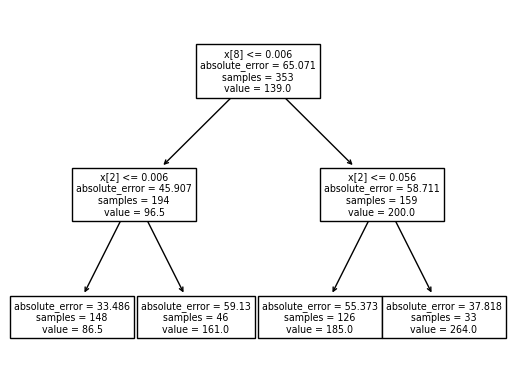

In [ ]:
plot_tree(dt)

In [ ]:
!pip install dtreeviz

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from dtreeviz import dtreeviz
from IPython.display import Image, display_svg, SVG

In [ ]:
viz = dtreeviz(dt,
               x_train,
               y_train,
               target_name='target',
               feature_names=a.feature_names,
               class_names=['target'],  # class_names parameter is required but won't affect regression trees
               orientation='TD')  # Set orientation to "TD" for horizontal layout

# Display the visualization
display_svg(viz.svg())

<ipython-input-199-b24807f85826>:1: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: ignored

In [ ]:
!pip install --upgrade dtreeviz
